<a href="https://colab.research.google.com/github/kajol16/Football_score_prediction/blob/main/football_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries and uploading the data file

In [67]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
files.upload()


Saving Brazil_serieA_2019.xlsx to Brazil_serieA_2019.xlsx


{'Brazil_serieA_2019.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

Reading the excel file and roming the unnecessary column

In [ ]:
data_file = pd.read_excel("Brazil_serieA_2019.xlsx")
data_file = data_file.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
#taking a look at the database
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11387 entries, 0 to 11386
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      11387 non-null  object 
 1   #           10627 non-null  float64
 2   Nation      10627 non-null  object 
 3   Pos         10627 non-null  object 
 4   Min         11371 non-null  float64
 5   Gls         11387 non-null  int64  
 6   Ast         11387 non-null  int64  
 7   PK          11387 non-null  int64  
 8   PKatt       11387 non-null  int64  
 9   Sh          11387 non-null  int64  
 10  SoT         11387 non-null  int64  
 11  CrdY        11387 non-null  int64  
 12  CrdR        11387 non-null  int64  
 13  Fls         11387 non-null  int64  
 14  Fld         11387 non-null  int64  
 15  Off         11387 non-null  int64  
 16  Crs         11387 non-null  int64  
 17  TklW        11387 non-null  int64  
 18  Int         11387 non-null  int64  
 19  OG          11387 non-nul

In [ ]:
data_file.columns

Index(['Player', '#', 'Nation', 'Pos', 'Min', 'Gls', 'Ast', 'PK', 'PKatt',
       'Sh', 'SoT', 'CrdY', 'CrdR', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'Int',
       'OG', 'PKwon', 'PKcon', 'Team_Home', 'Team_away', 'Match', 'Date',
       'Venue', 'Attendance'],
      dtype='object')

In [ ]:
data_file.head(16)
#look at the 14 line - there is a problem, the database summed all the players statistics, we have to take it out

total_filter = []
for i in data_file.Player:
    if "Players" in i:
        a = 1
    else:
        a = 0
    total_filter.append(a)
    
totalfilter = pd.DataFrame(total_filter)    

data_file["Filter"] = totalfilter

#Audience as number
data_file.Attendance = data_file.Attendance.str.replace(",",".")
data_file.Attendance = data_file.Attendance.astype(float)

#filtering the dataframe
data_file = data_file[data_file.Filter.eq(0)]
#now we have almost have a correct database, but still need some treatments


data_file.head(16)

Player     #  ... Attendance Filter
0       Franco Di Santo  26.0  ...     34.432      0
1                  Luan  27.0  ...     34.432      0
2              Vinícius  29.0  ...     34.432      0
3          Rómulo Otero  80.0  ...     34.432      0
4              Geuvânio  49.0  ...     34.432      0
5            Marquinhos  50.0  ...     34.432      0
6          Juan Cazares  10.0  ...     34.432      0
7              Bruninho  43.0  ...     34.432      0
8          José Welison  14.0  ...     34.432      0
9          Fábio Santos   6.0  ...     34.432      0
10         Iago Maidana  19.0  ...     34.432      0
11       Leonardo Silva   3.0  ...     34.432      0
12  Patric Cabral Lalau   2.0  ...     34.432      0
13   Cleiton Schwengber  40.0  ...     34.432      0
15          Marco Ruben   9.0  ...     34.432      0
16        Braian Romero  17.0  ...     34.432      0

[16 rows x 29 columns]

In [ ]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10627 entries, 0 to 11385
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      10627 non-null  object 
 1   #           10627 non-null  float64
 2   Nation      10627 non-null  object 
 3   Pos         10627 non-null  object 
 4   Min         10611 non-null  float64
 5   Gls         10627 non-null  int64  
 6   Ast         10627 non-null  int64  
 7   PK          10627 non-null  int64  
 8   PKatt       10627 non-null  int64  
 9   Sh          10627 non-null  int64  
 10  SoT         10627 non-null  int64  
 11  CrdY        10627 non-null  int64  
 12  CrdR        10627 non-null  int64  
 13  Fls         10627 non-null  int64  
 14  Fld         10627 non-null  int64  
 15  Off         10627 non-null  int64  
 16  Crs         10627 non-null  int64  
 17  TklW        10627 non-null  int64  
 18  Int         10627 non-null  int64  
 19  OG          10627 non-nul

Analyzing data

In [ ]:
data_file_br = data_file.groupby(['Match','Team_Home',"Date"], as_index=False)['Gls','Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR','Crs',
                                                                    'Fls','TklW', 'Int', 'Fld','Attendance','OG','Off'].sum()

data_file_br

# but we don't have the results of the matches in this database, so lets generate the results(victory,loss,draw) for each team
# and for every match, by that we are going t be able to take a real good look at all data, and how it's distribuited.

Match            Team_Home  ... OG  Off
0    Atlético_Mineiro_vs_Atlético_Paranaense     Atlético Mineiro  ...  0    0
1    Atlético_Mineiro_vs_Atlético_Paranaense  Atlético Paranaense  ...  0    0
2                   Atlético_Mineiro_vs_Avaí     Atlético Mineiro  ...  0    0
3                   Atlético_Mineiro_vs_Avaí                 Avaí  ...  0    2
4                  Atlético_Mineiro_vs_Bahia     Atlético Mineiro  ...  0    1
..                                       ...                  ...  ... ..  ...
755               Vasco_da_Gama_vs_Palmeiras        Vasco da Gama  ...  0    1
756                  Vasco_da_Gama_vs_Santos               Santos  ...  0    1
757                  Vasco_da_Gama_vs_Santos        Vasco da Gama  ...  0    1
758               Vasco_da_Gama_vs_São_Paulo            São Paulo  ...  0    2
759               Vasco_da_Gama_vs_São_Paulo        Vasco da Gama  ...  0    0

[760 rows x 19 columns]

This creates a new column with the result of the match ie., Win, Loose, Draw

In [ ]:
Matches = pd.DataFrame(data_file_br.Match.drop_duplicates())
Matches = Matches.reset_index(drop=True)

test = []

for i in Matches.Match:
    i = str(i)
    oi = data_file_br.loc[data_file_br["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0]+oi.OG[1])-(oi.Gls[1]+oi.OG[0])#goals +own goals of the other team
    if b <0:
        a = 0#to losers
        b = 1#to winners
        test.append(a)
        test.append(b)
    elif b>0:
        a = 1#to winners
        b = 0#to losers
        test.append(a)
        test.append(b)
    else:
        a = 2#draw
        b = 2#draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)
data_file_br["Result"] = test


data_file_br.head(25)

Match            Team_Home  ... Off  Result
0   Atlético_Mineiro_vs_Atlético_Paranaense     Atlético Mineiro  ...   0       0
1   Atlético_Mineiro_vs_Atlético_Paranaense  Atlético Paranaense  ...   0       1
2                  Atlético_Mineiro_vs_Avaí     Atlético Mineiro  ...   0       1
3                  Atlético_Mineiro_vs_Avaí                 Avaí  ...   2       0
4                 Atlético_Mineiro_vs_Bahia     Atlético Mineiro  ...   1       0
5                 Atlético_Mineiro_vs_Bahia                Bahia  ...   0       1
6         Atlético_Mineiro_vs_Botafogo_(RJ)     Atlético Mineiro  ...   2       1
7         Atlético_Mineiro_vs_Botafogo_(RJ)        Botafogo (RJ)  ...   1       0
8                   Atlético_Mineiro_vs_CSA     Atlético Mineiro  ...   2       1
9                   Atlético_Mineiro_vs_CSA                  CSA  ...   0       0
10                Atlético_Mineiro_vs_Ceará     Atlético Mineiro  ...   0       1
11                Atlético_Mineiro_vs_Ceará                Ceará  ...   1       0
12          Atlético_Mineiro_vs_Chapecoense     Atlético Mineiro  ...   2       0
13          Atlético_Mineiro_vs_Chapecoense          Chapecoense  ...   0       1
14          Atlético_Mineiro_vs_Corinthians     Atlético Mineiro  ...   2       1
15          Atlético_Mineiro_vs_Corinthians          Corinthians  ...   3       0
16             Atlético_Mineiro_vs_Cruzeiro     Atlético Mineiro  ...   0       1
17             Atlético_Mineiro_vs_Cruzeiro             Cruzeiro  ...   2       0
18             Atlético_Mineiro_vs_Flamengo     Atlético Mineiro  ...   0       1
19             Atlético_Mineiro_vs_Flamengo             Flamengo  ...   0       0
20           Atlético_Mineiro_vs_Fluminense     Atlético Mineiro  ...   4       1
21           Atlético_Mineiro_vs_Fluminense           Fluminense  ...   2       0
22            Atlético_Mineiro_vs_Fortaleza     Atlético Mineiro  ...   0       2
23            Atlético_Mineiro_vs_Fortaleza            Fortaleza  ...   0       2
24                Atlético_Mineiro_vs_Goiás     Atlético Mineiro  ...   4       1

[25 rows x 20 columns]

Adding the place column as variable

In [ ]:
o = []
for i,j in zip(data_file_br.Match,data_file_br.Team_Home):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a="Home"
    else:
        a="Away"
    o.append(a)

test = pd.DataFrame(o)
data_file_br["Place"] = test
data_file_br

Match            Team_Home  ... Result  Place
0    Atlético_Mineiro_vs_Atlético_Paranaense     Atlético Mineiro  ...      0   Home
1    Atlético_Mineiro_vs_Atlético_Paranaense  Atlético Paranaense  ...      1   Away
2                   Atlético_Mineiro_vs_Avaí     Atlético Mineiro  ...      1   Home
3                   Atlético_Mineiro_vs_Avaí                 Avaí  ...      0   Away
4                  Atlético_Mineiro_vs_Bahia     Atlético Mineiro  ...      0   Home
..                                       ...                  ...  ...    ...    ...
755               Vasco_da_Gama_vs_Palmeiras        Vasco da Gama  ...      0   Home
756                  Vasco_da_Gama_vs_Santos               Santos  ...      1   Away
757                  Vasco_da_Gama_vs_Santos        Vasco da Gama  ...      0   Home
758               Vasco_da_Gama_vs_São_Paulo            São Paulo  ...      0   Away
759               Vasco_da_Gama_vs_São_Paulo        Vasco da Gama  ...      1   Home

[760 rows x 21 columns]

If the user wants to create a analysis for every team. Then these functions were created to help in this task.

In [ ]:
def attack_team(team,place):
    '''
    Description: Generates attacking graphs analysis for a desired team and for a desired place
    
    Inputs:
        - Team: Name of the team desired (str)
        - place: Home/Away (str)
    
    Outputs:
    
    '''
    base_test = data_file_br.loc[data_file_br["Team_Home"]==team]
    
    base_test = data_file_br.loc[data_file_br["Place"]==place]

    base_test = base_test.drop(columns=["Match","Team_Home","Date"])

    base_test= base_test.reset_index(drop=True)

    di = {0: "Loss",
          1: "Victory",
          2: "Draw"}

    base_test = base_test.replace({'Result':di})

    g = sns.PairGrid(base_test, vars=["SoT","Sh","Gls","Attendance"], hue="Result",height=5)
    g.map(sns.scatterplot)
    g.add_legend()
    
    
    sns.relplot(x="SoT", y="Sh", hue="Result",size="Attendance",palette="muted",  
            sizes=(400, 100), alpha=1.,legend="brief",
            height=6, data=base_test) 
    
    
def defense_team(team,place):
    '''
    Description: Generates attacking graphs analysis for a desired team and for a desired place
    
    Inputs:
        - Team: Name of the team desired (str)
        - place: Home/Away (str)
    
    Outputs:
    
    '''
    base_test = data_file_br.loc[data_file_br["Team_Home"]==team]
    
    base_test = data_file_br.loc[data_file_br["Place"]==place]

    base_test = base_test.drop(columns=["Match","Team_Home","Date"])

    base_test= base_test.reset_index(drop=True)

    di = {0: "Loss",
          1: "Victory",
          2: "Draw"}

    base_test = base_test.replace({'Result':di})

    g = sns.PairGrid(base_test, vars=["TklW","Fls","CrdY","Attendance"], hue="Result",height=5)
    g.map(sns.scatterplot)
    g.add_legend()

    sns.relplot(x="Fls", y="TklW", hue="Result",size="CrdY",palette="muted",  
        sizes=(400, 100), alpha=1.,legend="brief",
        height=6, data=base_test)


Defense Team Analysis

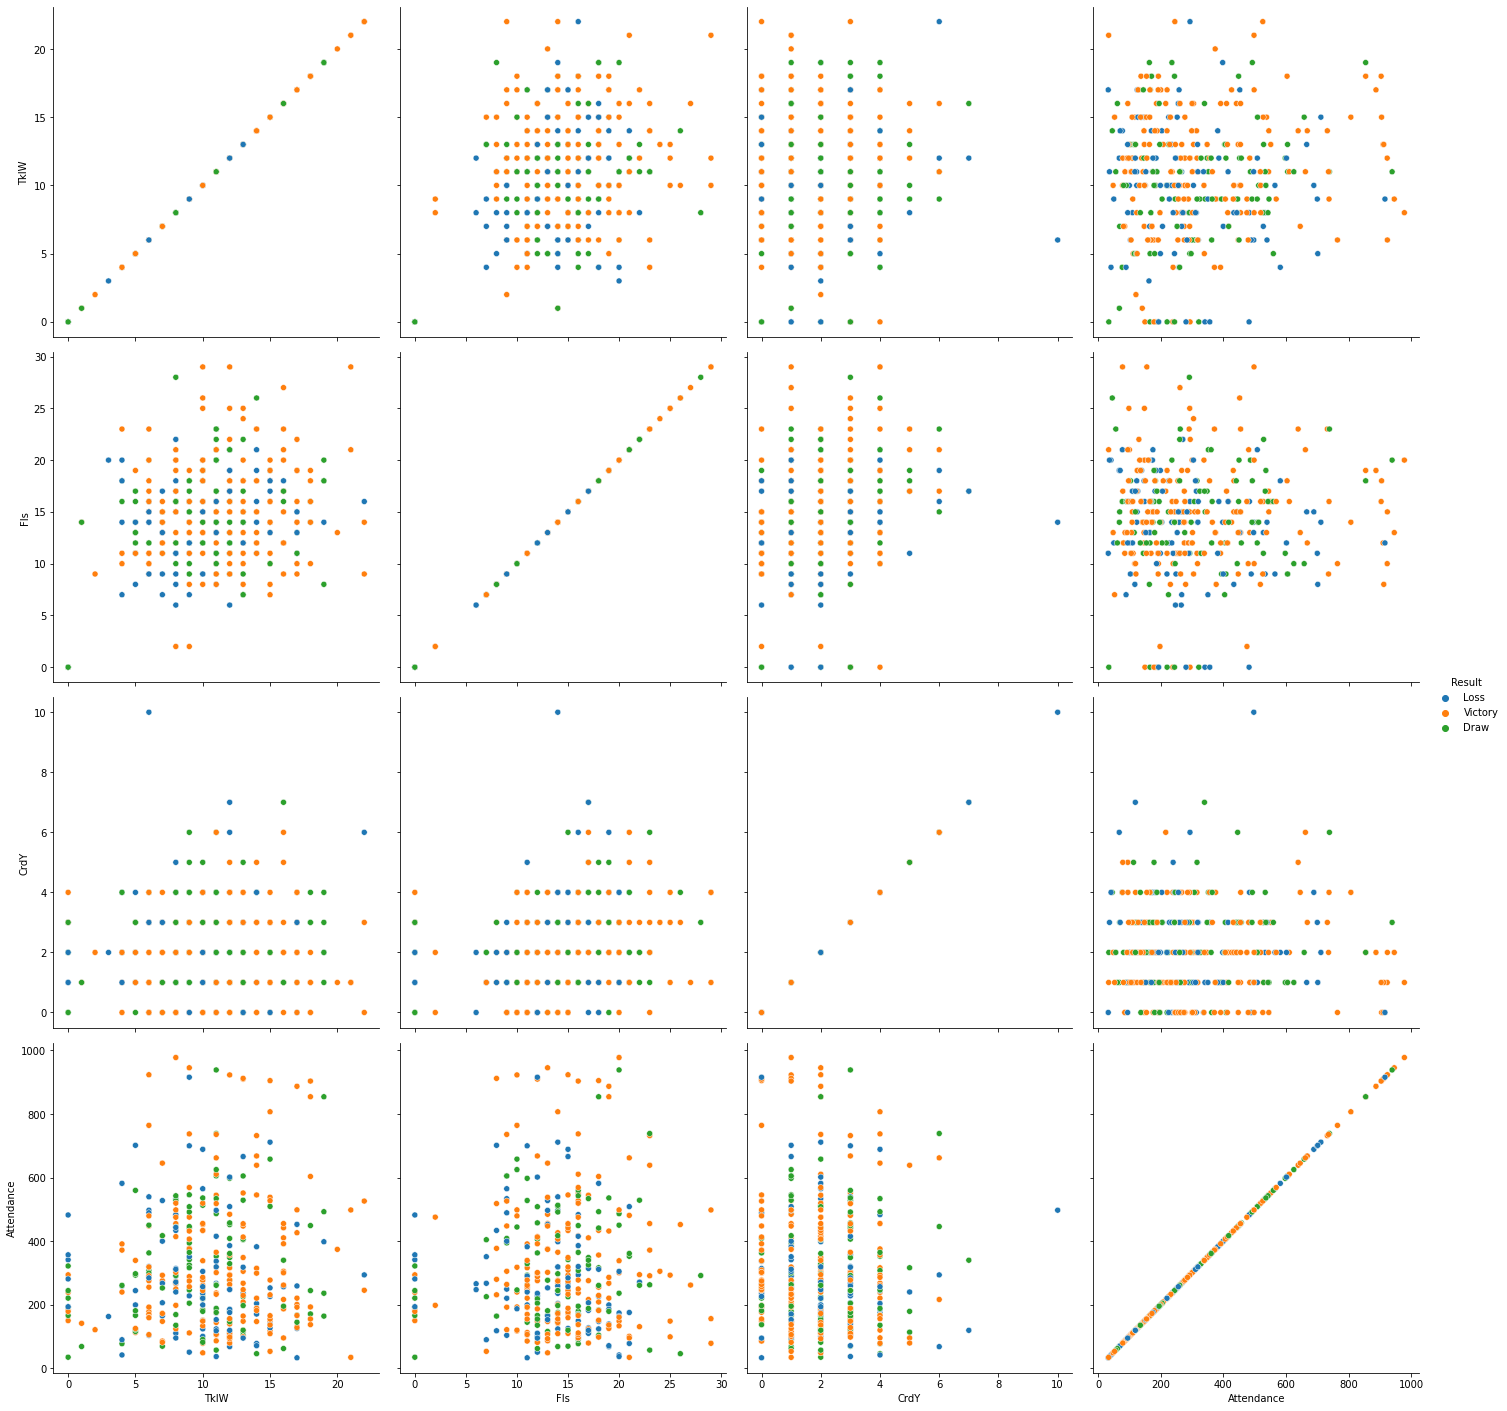

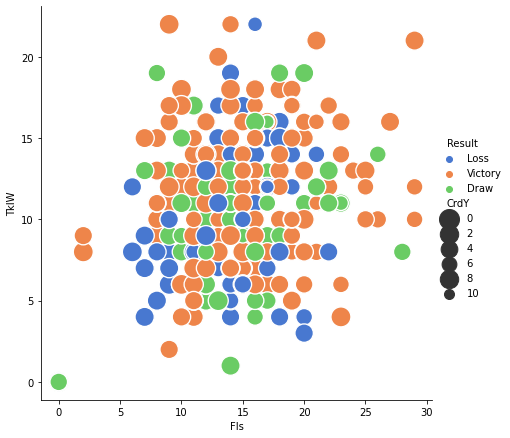

In [ ]:
defense_team("Matches","Home")

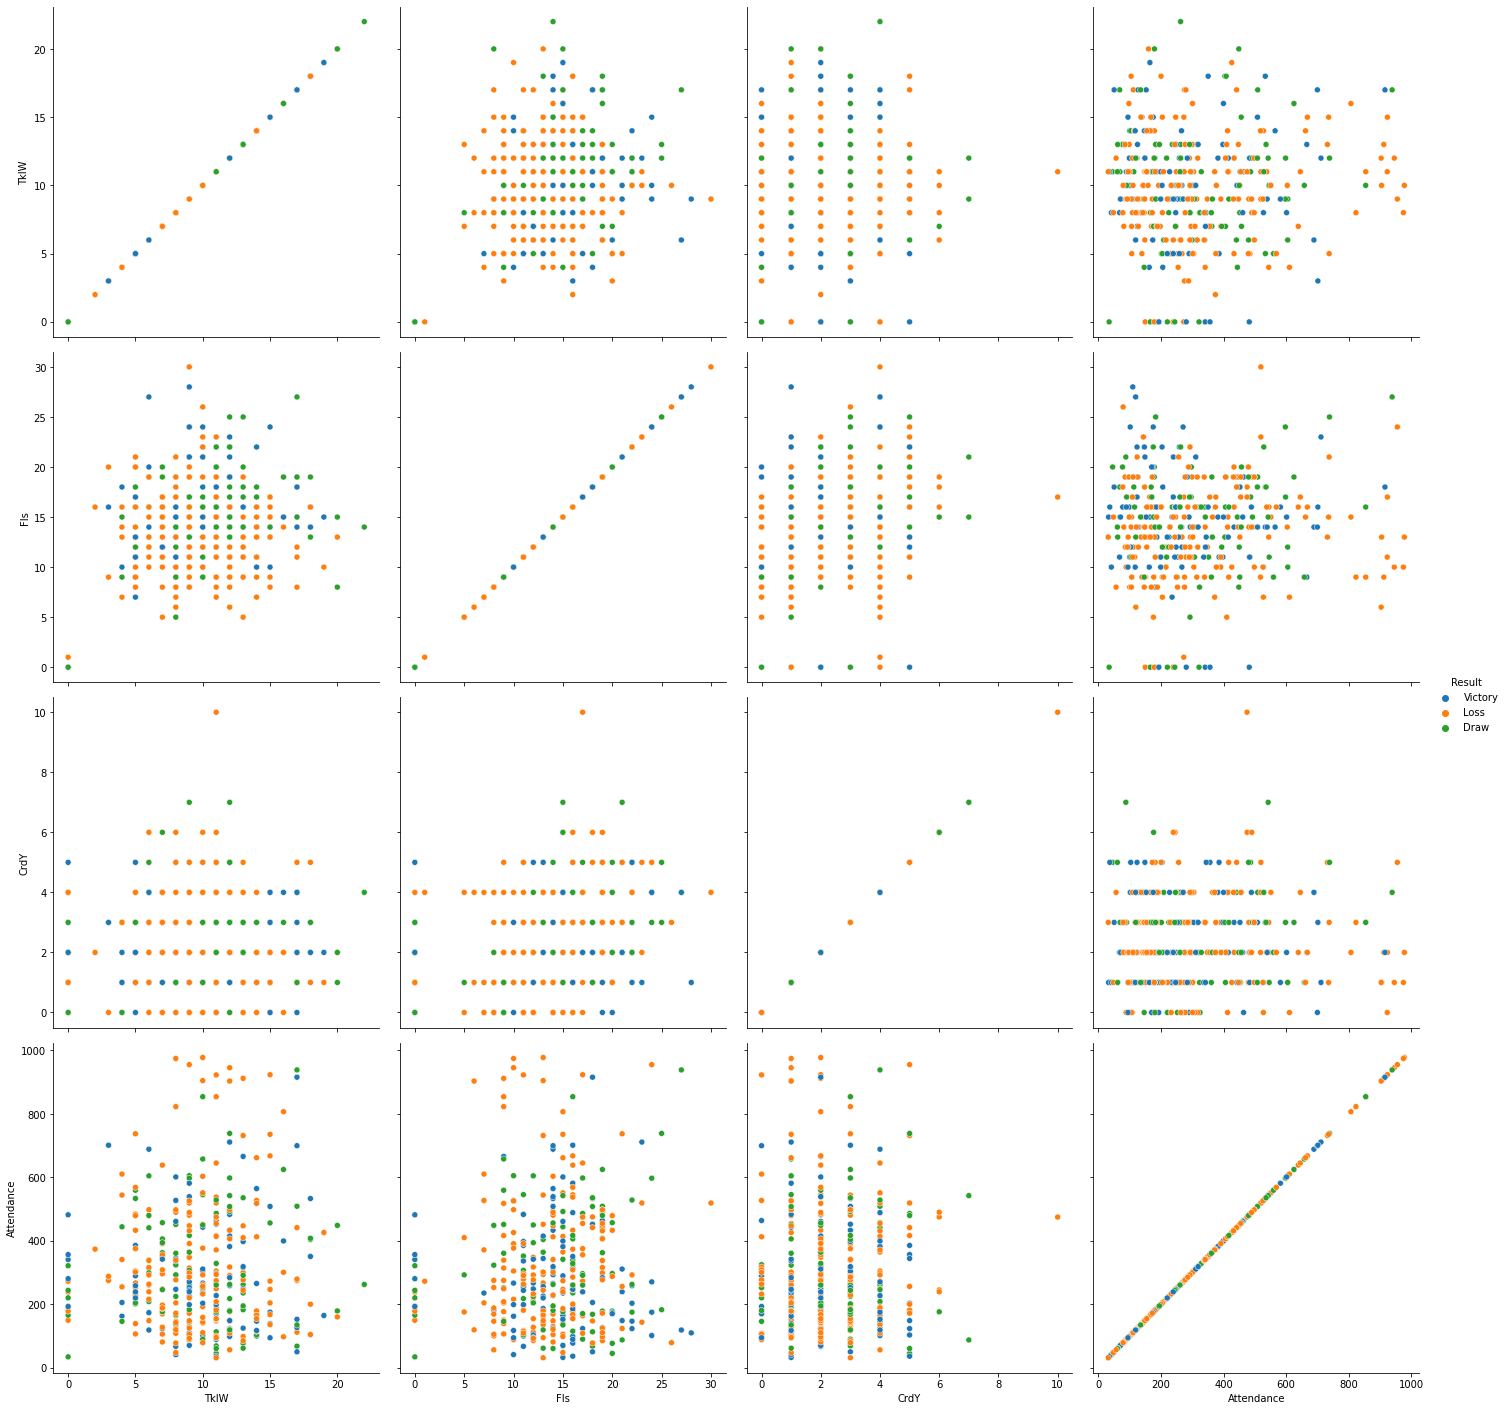

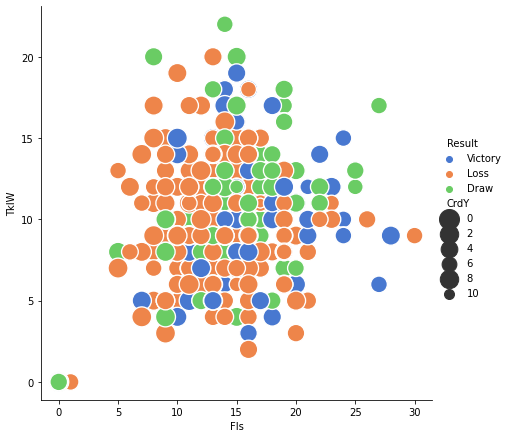

In [ ]:

defense_team("Matches","Away")


Attacking team analysis

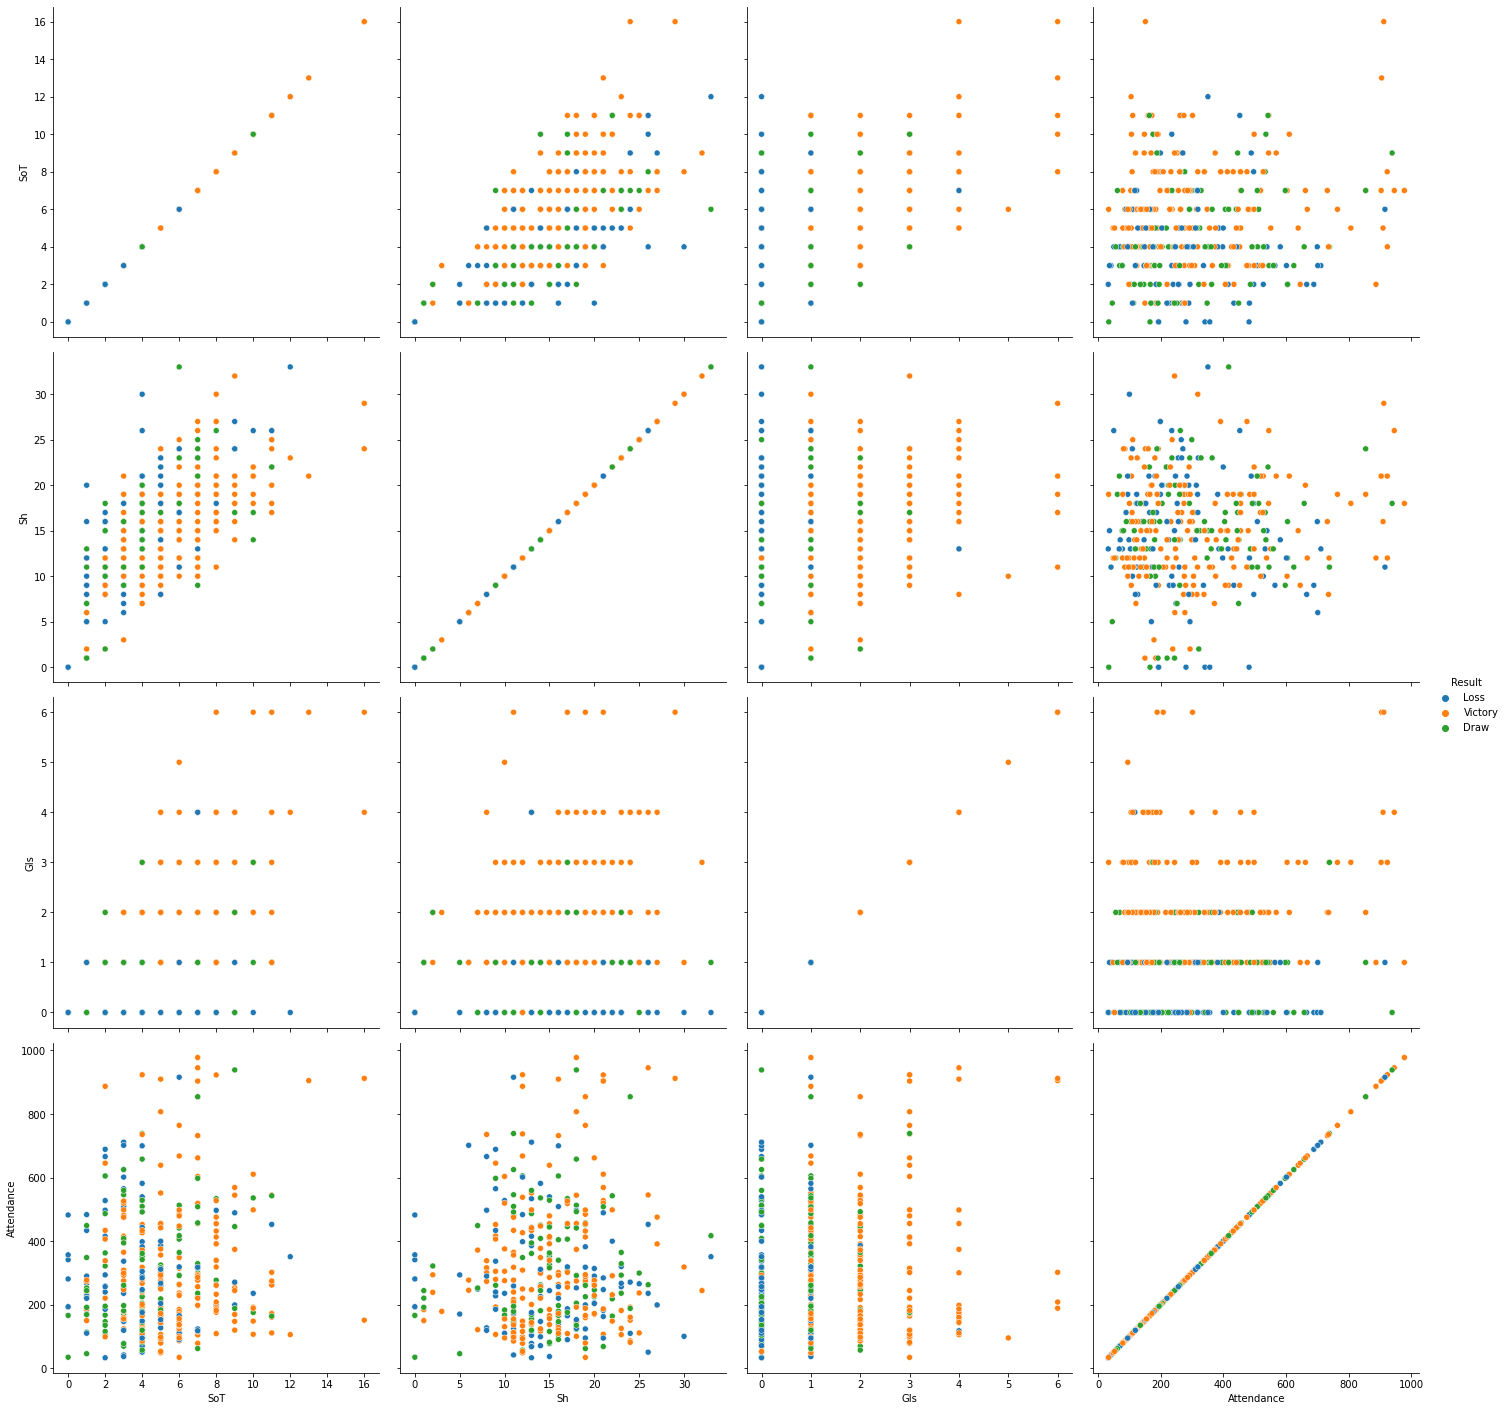

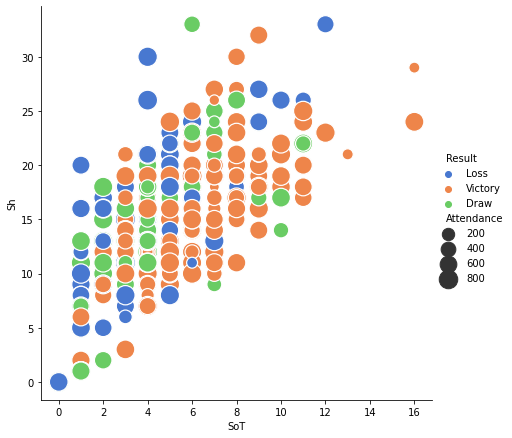

In [ ]:
attack_team("Matches","Home")

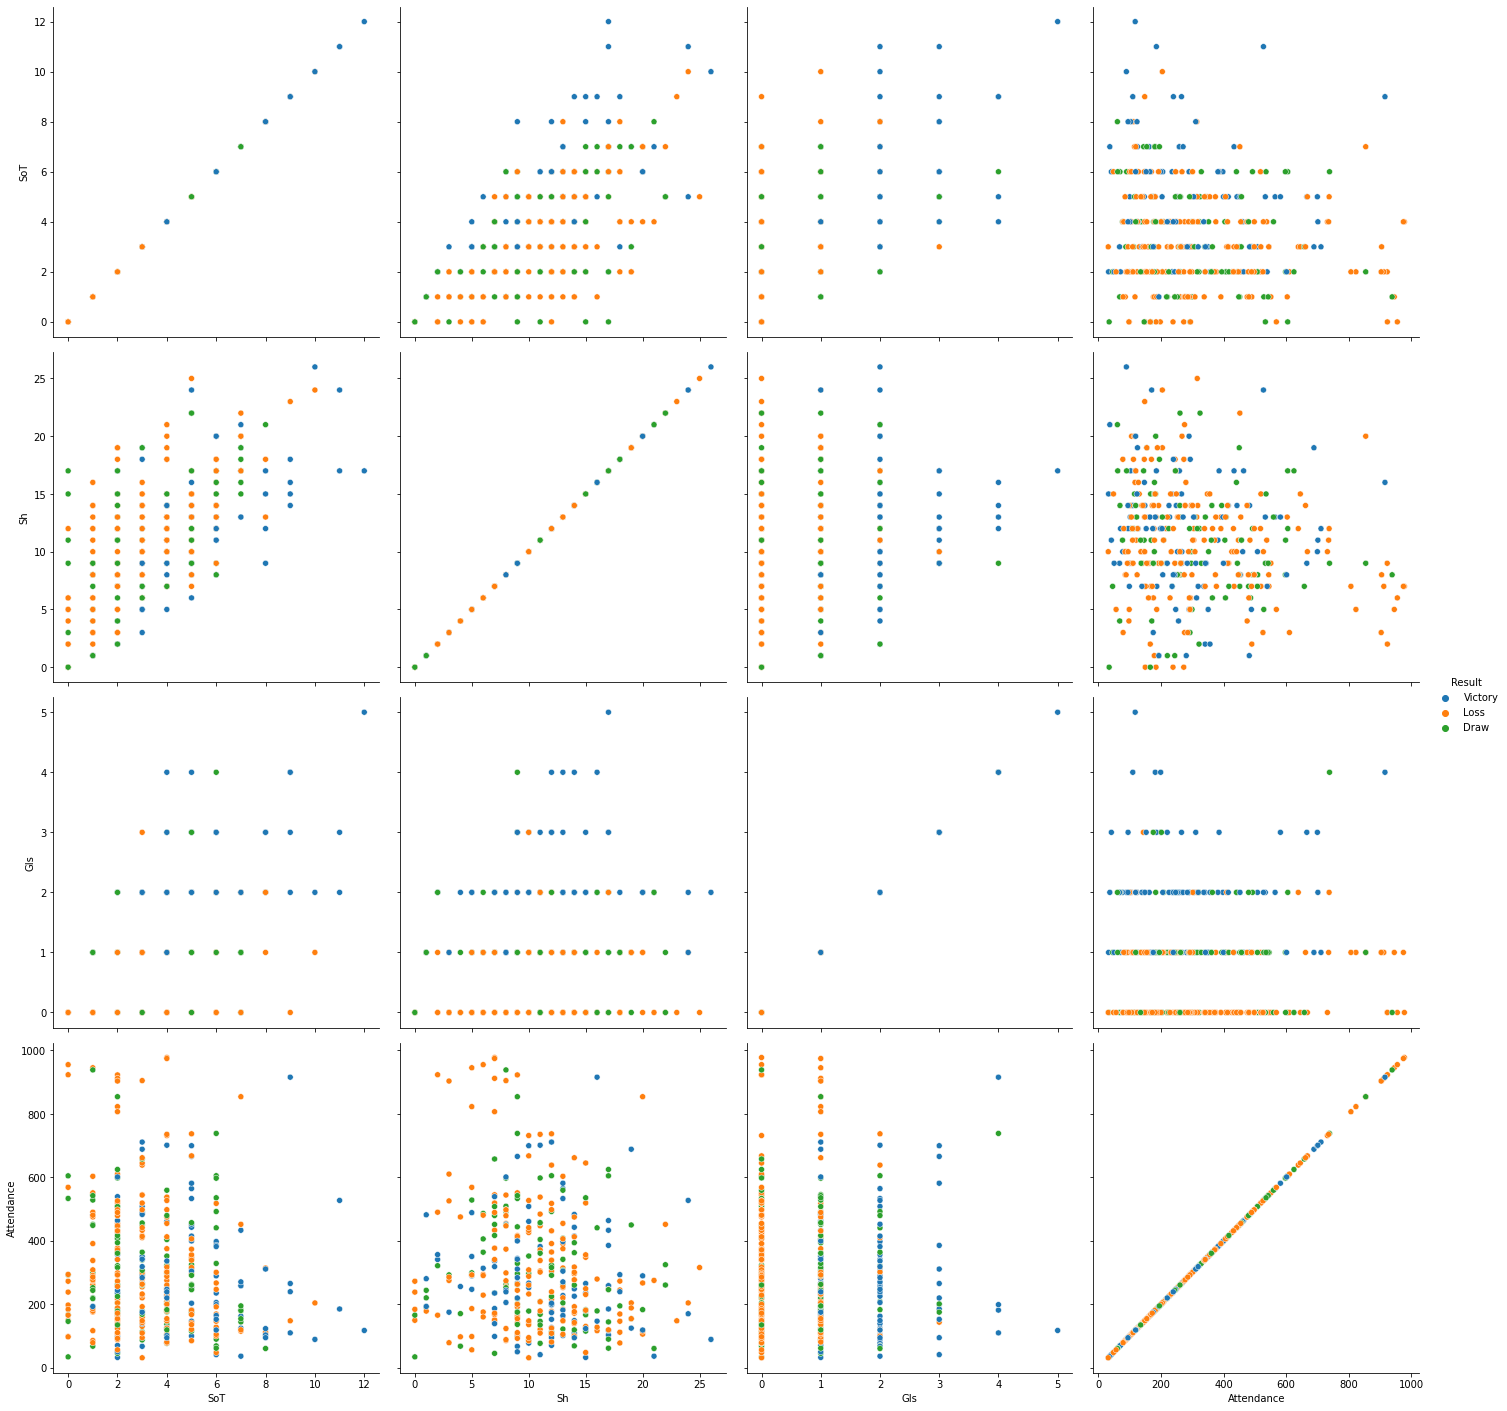

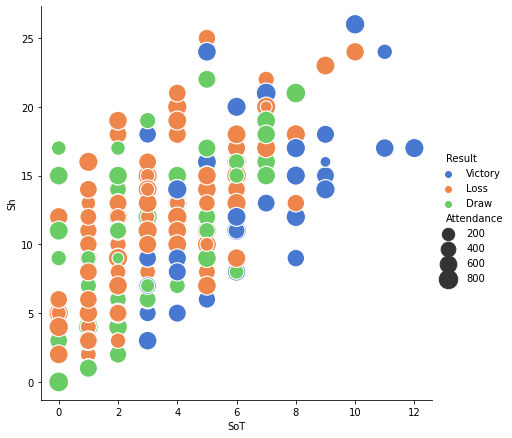

In [ ]:
attack_team("Matches","Away")

# **Pre-Processing**
Creating columns for final prediction based on existing data

In [ ]:
#create a new Date for Date column
new_date = [] 
for i in data_file_br.Date:
    i = str(i).replace("-","")
    new_date.append(i)

data_file_br["Date_new"] = pd.DataFrame(np.array(new_date))
data_file_br

Match  ...  Date_new
0    Atlético_Mineiro_vs_Atlético_Paranaense  ...  20191124
1    Atlético_Mineiro_vs_Atlético_Paranaense  ...  20191124
2                   Atlético_Mineiro_vs_Avaí  ...  20190427
3                   Atlético_Mineiro_vs_Avaí  ...  20190427
4                  Atlético_Mineiro_vs_Bahia  ...  20190824
..                                       ...  ...       ...
755               Vasco_da_Gama_vs_Palmeiras  ...  20191106
756                  Vasco_da_Gama_vs_Santos  ...  20191005
757                  Vasco_da_Gama_vs_Santos  ...  20191005
758               Vasco_da_Gama_vs_São_Paulo  ...  20190825
759               Vasco_da_Gama_vs_São_Paulo  ...  20190825

[760 rows x 22 columns]

Inserting some new variables as sequences of the variables of season games and points

In [ ]:
def average_season(variable):
    '''
    Description: Its picks a variable(str) and generates the mean of this variable until the last game played.
    
    Input:
        - Variable (Str)
    Output: 
        - Season Mean Variable until the new game (Int)    
    
    '''
    media = []
    for i, j in zip(data_file_br["Date_new"],data_file_br["Team_Home"]):
        oi = data_file_br.loc[data_file_br["Date_new"]<i]
        oi = oi.loc[oi["Team_Home"]==j]
        oi = oi[variable].mean()
        media.append(oi)

    data_file_br["avrg_"+variable] = pd.DataFrame(np.array(media))
    
    
def average_last_3(variable):
    '''
    Description: Its picks a variable(str) and generates the 3 last games mean of this variable until the last game played.
    
    Input:
        - Variable (Str)
    Output: 
        - Last 3 games Variable Mean until the new game (Int)    
    
    '''
    media = []
    for i, j in zip(data_file_br["Date_new"],data_file_br["Team_Home"]):
        oi = data_file_br.loc[data_file_br["Date_new"]<i]
        oi = oi.loc[oi["Team_Home"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[variable].mean()
        media.append(oi)

    data_file_br["last_3_avrg_"+variable] = pd.DataFrame(np.array(media))    
    
    
def sequence_5():
    '''
    Description: Picks the last 5 games and calculates how many points the team scored, victory = 3
    loss = 0, draw = 1.
    
    Input:
        - None
    Output: 
        - Sequence of the last 5 games points    
    
    '''
    sequences = []
    for i, j in zip(data_file_br["Date_new"],data_file_br["Team_Home"]):
        oi = data_file_br.loc[data_file_br["Date_new"]<i]
        oi = oi.loc[oi["Team_Home"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-5:]
        di = {1:3,
             2:1,
             0:0}
        oi = oi.replace({"Result":di})
        oi = oi.Result.sum()
        sequences.append(oi)
    data_file_br["pnts_lst_5"] = pd.DataFrame(np.array(sequences))
    
def sequence_3():
    '''
    Description: Picks the last 3 games and calculates how many points the team scored, victory = 3
    loss = 0, draw = 1.
    
    Input:
        - None
    Output: 
        - Sequence of the last 3 games points    
    
    '''
    sequences = []
    for i, j in zip(data_file_br["Date_new"],data_file_br["Team_Home"]):
        oi = data_file_br.loc[data_file_br["Date_new"]<i]
        oi = oi.loc[oi["Team_Home"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        di = {1:3,
             2:1,
             0:0}
        oi = oi.replace({"Result":di})
        oi = oi.Result.sum()
        sequences.append(oi)
    data_file_br["pnts_lst_3"] = pd.DataFrame(np.array(sequences))
    
    
def sequence_1():
    '''
    Description: Picks the last game and calculates how many points the team scored, victory = 3
    loss = 0, draw = 1.
    
    Input:
        - None
    Output: 
        - Sequence of the last game points    
    
    '''
    sequences = []
    for i, j in zip(data_file_br["Date_new"],data_file_br["Team_Home"]):
        oi = data_file_br.loc[data_file_br["Date_new"]<i]
        oi = oi.loc[oi["Team_Home"]==j]
        oi= oi.reset_index(drop=True)
        oi = oi[-1:]
        di = {1:3,
             2:1,
             0:0}
        oi = oi.replace({"Result":di})
        oi = oi.Result.sum()
        sequences.append(oi)
    data_file_br["pnts_lst_game"] = pd.DataFrame(np.array(sequences))

Using all the created functions 

In [ ]:


variables_average = data_file_br.drop(columns=['Match','Date','Result', 'Place', 'Date_new',"Team_Home"])

for i in variables_average.columns:
    average_season(i)
    average_last_3(i)
    
    
sequence_5()
sequence_3()
sequence_1()

In [ ]:
data_file_br

Match  ... pnts_lst_game
0    Atlético_Mineiro_vs_Atlético_Paranaense  ...             3
1    Atlético_Mineiro_vs_Atlético_Paranaense  ...             1
2                   Atlético_Mineiro_vs_Avaí  ...             0
3                   Atlético_Mineiro_vs_Avaí  ...             0
4                  Atlético_Mineiro_vs_Bahia  ...             3
..                                       ...  ...           ...
755               Vasco_da_Gama_vs_Palmeiras  ...             3
756                  Vasco_da_Gama_vs_Santos  ...             0
757                  Vasco_da_Gama_vs_Santos  ...             3
758               Vasco_da_Gama_vs_São_Paulo  ...             3
759               Vasco_da_Gama_vs_São_Paulo  ...             3

[760 rows x 57 columns]

In [ ]:
data_file_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Match                   760 non-null    object 
 1   Team_Home               760 non-null    object 
 2   Date                    760 non-null    object 
 3   Gls                     760 non-null    int64  
 4   Ast                     760 non-null    int64  
 5   PK                      760 non-null    int64  
 6   PKatt                   760 non-null    int64  
 7   Sh                      760 non-null    int64  
 8   SoT                     760 non-null    int64  
 9   CrdY                    760 non-null    int64  
 10  CrdR                    760 non-null    int64  
 11  Crs                     760 non-null    int64  
 12  Fls                     760 non-null    int64  
 13  TklW                    760 non-null    int64  
 14  Int                     760 non-null    in

**Away Team**

In [ ]:
team_away = []

for i in data_file_br.Match:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[1])
    i_1 = i_1.replace("_"," ")
    team_away.append(i_1)
            
        
data_file_br["team_away"] = pd.DataFrame(np.array(team_away))


team_home = []

for i in data_file_br.Match:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[0])
    i_1 = i_1.replace("_"," ")
    team_home.append(i_1)
        
        
data_file_br["team_home"] = pd.DataFrame(np.array(team_home))

In [ ]:
data_file_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Match                   760 non-null    object 
 1   Team_Home               760 non-null    object 
 2   Date                    760 non-null    object 
 3   Gls                     760 non-null    int64  
 4   Ast                     760 non-null    int64  
 5   PK                      760 non-null    int64  
 6   PKatt                   760 non-null    int64  
 7   Sh                      760 non-null    int64  
 8   SoT                     760 non-null    int64  
 9   CrdY                    760 non-null    int64  
 10  CrdR                    760 non-null    int64  
 11  Crs                     760 non-null    int64  
 12  Fls                     760 non-null    int64  
 13  TklW                    760 non-null    int64  
 14  Int                     760 non-null    in

In [ ]:
Matches = data_file_br[['Match','Date_new']].drop_duplicates().reset_index(drop=True)
team_home = []

for i in Matches.Match:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[0])
    i_1 = i_1.replace("_"," ")
    team_home.append(i_1)
        
        
Matches["Team_Home"] = pd.DataFrame(np.array(team_home))



team_away = []

for i in Matches.Match:
    i = str(i)
    i = i.split("_vs_")
    i_1 = str(i[1])
    i_1 = i_1.replace("_"," ")
    team_away.append(i_1)
        
        
Matches["team_away"] = pd.DataFrame(np.array(team_away))
Matches

Match  ...            team_away
0    Atlético_Mineiro_vs_Atlético_Paranaense  ...  Atlético Paranaense
1                   Atlético_Mineiro_vs_Avaí  ...                 Avaí
2                  Atlético_Mineiro_vs_Bahia  ...                Bahia
3          Atlético_Mineiro_vs_Botafogo_(RJ)  ...        Botafogo (RJ)
4                    Atlético_Mineiro_vs_CSA  ...                  CSA
..                                       ...  ...                  ...
375                  Vasco_da_Gama_vs_Grêmio  ...               Grêmio
376           Vasco_da_Gama_vs_Internacional  ...        Internacional
377               Vasco_da_Gama_vs_Palmeiras  ...            Palmeiras
378                  Vasco_da_Gama_vs_Santos  ...               Santos
379               Vasco_da_Gama_vs_São_Paulo  ...            São Paulo

[380 rows x 4 columns]

In [ ]:
data_file_inner = Matches.merge(data_file_br, how='inner', left_on=['Match', "Date_new","Team_Home"], right_on=['Match','Date_new',"Team_Home"])


data_file_inner = data_file_inner[['Match', 'Date_new', 'Team_Home','avrg_Gls', 'last_3_avrg_Gls',
                           'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK', 'last_3_avrg_PK',
                           'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh', 'last_3_avrg_Sh',
                           'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY', 'last_3_avrg_CrdY',
                           'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs', 'last_3_avrg_Crs',
                           'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW', 'last_3_avrg_TklW',
                           'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld', 'last_3_avrg_Fld',
                           'avrg_Attendance', 'last_3_avrg_Attendance', 'avrg_OG', 'last_3_avrg_OG',
                           'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5', 'pnts_lst_3',
                           'pnts_lst_game','Gls']]

In [ ]:
data_file_inner

Match  Date_new  ... pnts_lst_game  Gls
0    Atlético_Mineiro_vs_Atlético_Paranaense  20191124  ...             3    0
1                   Atlético_Mineiro_vs_Avaí  20190427  ...             0    2
2                  Atlético_Mineiro_vs_Bahia  20190824  ...             3    0
3          Atlético_Mineiro_vs_Botafogo_(RJ)  20191204  ...             3    2
4                    Atlético_Mineiro_vs_CSA  20190602  ...             3    4
..                                       ...       ...  ...           ...  ...
375                  Vasco_da_Gama_vs_Grêmio  20191030  ...             3    1
376           Vasco_da_Gama_vs_Internacional  20190607  ...             1    2
377               Vasco_da_Gama_vs_Palmeiras  20191106  ...             3    0
378                  Vasco_da_Gama_vs_Santos  20191005  ...             3    0
379               Vasco_da_Gama_vs_São_Paulo  20190825  ...             3    2

[380 rows x 39 columns]

In [ ]:
data_file_outer = data_file_br.loc[data_file_br["Team_Home"] == data_file_br["team_away"]]

data_file_outer = data_file_outer[['Match', 'Date_new', 'team_away','avrg_Gls', 'last_3_avrg_Gls',
                           'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK', 'last_3_avrg_PK',
                           'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh', 'last_3_avrg_Sh',
                           'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY', 'last_3_avrg_CrdY',
                           'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs', 'last_3_avrg_Crs',
                           'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW', 'last_3_avrg_TklW',
                           'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld', 'last_3_avrg_Fld',
                           'avrg_Attendance', 'last_3_avrg_Attendance', 'avrg_OG', 'last_3_avrg_OG',
                           'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5', 'pnts_lst_3',
                           'pnts_lst_game','Gls']]

data_file_outer = data_file_outer.reset_index(drop=True)
data_file_outer = Matches.merge(data_file_outer, how='inner', left_on=['Match', "Date_new","team_away"], right_on=['Match','Date_new',"team_away"])
data_file_outer = data_file_outer[['Match', 'Date_new', 'team_away','avrg_Gls', 'last_3_avrg_Gls',
                       'avrg_Ast', 'last_3_avrg_Ast', 'avrg_PK', 'last_3_avrg_PK',
                       'avrg_PKatt', 'last_3_avrg_PKatt', 'avrg_Sh', 'last_3_avrg_Sh',
                       'avrg_SoT', 'last_3_avrg_SoT', 'avrg_CrdY', 'last_3_avrg_CrdY',
                       'avrg_CrdR', 'last_3_avrg_CrdR', 'avrg_Crs', 'last_3_avrg_Crs',
                       'avrg_Fls', 'last_3_avrg_Fls', 'avrg_TklW', 'last_3_avrg_TklW',
                       'avrg_Int', 'last_3_avrg_Int', 'avrg_Fld', 'last_3_avrg_Fld',
                       'avrg_Attendance', 'last_3_avrg_Attendance', 'avrg_OG', 'last_3_avrg_OG',
                       'avrg_Off', 'last_3_avrg_Off', 'pnts_lst_5', 'pnts_lst_3',
                       'pnts_lst_game','Gls']]

In [ ]:
data_file_outer

Match  Date_new  ... pnts_lst_game  Gls
0    Atlético_Mineiro_vs_Atlético_Paranaense  20191124  ...             1    1
1                   Atlético_Mineiro_vs_Avaí  20190427  ...             0    1
2                  Atlético_Mineiro_vs_Bahia  20190824  ...             1    1
3          Atlético_Mineiro_vs_Botafogo_(RJ)  20191204  ...             0    0
4                    Atlético_Mineiro_vs_CSA  20190602  ...             0    0
..                                       ...       ...  ...           ...  ...
375                  Vasco_da_Gama_vs_Grêmio  20191030  ...             1    3
376           Vasco_da_Gama_vs_Internacional  20190607  ...             1    1
377               Vasco_da_Gama_vs_Palmeiras  20191106  ...             1    2
378                  Vasco_da_Gama_vs_Santos  20191005  ...             0    1
379               Vasco_da_Gama_vs_São_Paulo  20190825  ...             3    0

[380 rows x 39 columns]

In [ ]:
data_file_outer_final = data_file_outer.sort_values(["Date_new",'Match'])
data_file_inner_final = data_file_inner.sort_values(["Date_new",'Match'])


data_file_outer_final = data_file_outer_final.reset_index(drop=True)
data_file_inner_final = data_file_inner_final.reset_index(drop=True)

In [ ]:
data_file_outer_final0 = data_file_outer_final[['Match', 'Date_new', 'team_away']]



data_file_outer_final1 = data_file_outer_final.drop(columns=['Match', 'Date_new', 'team_away'])


data_file_inner_final0 = data_file_inner_final[['Match', 'Date_new', 'Team_Home']]



data_file_inner_final1 = data_file_inner_final.drop(columns=['Match', 'Date_new', 'Team_Home'])


data_final_atributes = data_file_inner_final1 - data_file_outer_final1

In [ ]:
data_final_atributes

avrg_Gls  last_3_avrg_Gls  avrg_Ast  ...  pnts_lst_3  pnts_lst_game  Gls
0         NaN              NaN       NaN  ...           0              0    1
1         NaN              NaN       NaN  ...           0              0    2
2         NaN              NaN       NaN  ...           0              0    2
3         NaN              NaN       NaN  ...           0              0    2
4         NaN              NaN       NaN  ...           0              0    2
..        ...              ...       ...  ...         ...            ...  ...
375  0.135135         0.666667  0.189189  ...          -3             -3    1
376 -0.486486        -1.333333 -0.621622  ...          -3             -2    1
377 -0.054054        -0.333333 -0.027027  ...          -2             -3    1
378 -0.837838        -1.000000 -0.756757  ...          -1              0    4
379  0.162162         0.666667 -0.027027  ...           3              3    0

[380 rows x 36 columns]

In [ ]:
result = pd.concat([data_file_inner_final0,data_file_outer_final0.team_away ,data_final_atributes], axis=1, sort=False)

final_goal = data_file_inner_final1.Gls + data_file_outer_final1.Gls

scoreboard = []

for i in result.Gls:
    if i ==0:
        a = 3
        scoreboard.append(a)
    elif i >0:
        a = 1
        scoreboard.append(a)
    elif i <0:
        a = 2
        scoreboard.append(a)

result["Result"] = pd.DataFrame(np.array(scoreboard))
result["N_Goals"] = pd.DataFrame(np.array(final_goal))

result = result.fillna(0)

result = result.drop(columns=['Gls'])

result

Match  Date_new  ... Result N_Goals
0                Atlético_Mineiro_vs_Avaí  20190427  ...      1       3
1            Chapecoense_vs_Internacional  20190427  ...      1       2
2                    Flamengo_vs_Cruzeiro  20190427  ...      1       4
3              São_Paulo_vs_Botafogo_(RJ)  20190427  ...      1       2
4    Atlético_Paranaense_vs_Vasco_da_Gama  20190428  ...      1       4
..                                    ...       ...  ...    ...     ...
375                    Fortaleza_vs_Bahia  20191208  ...      1       3
376                       Goiás_vs_Grêmio  20191208  ...      1       5
377     Internacional_vs_Atlético_Mineiro  20191208  ...      1       3
378                    Santos_vs_Flamengo  20191208  ...      1       4
379          Vasco_da_Gama_vs_Chapecoense  20191208  ...      3       2

[380 rows x 41 columns]

**Models for evaluating**

In [54]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

warnings.filterwarnings("ignore")

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()
clf_btree = BaggingClassifier()
clf_lgg   = lgb.LGBMClassifier()
clf_sgd = SGDClassifier()
clf_ridge = RidgeClassifier()


entry = result.drop(columns=['Match', 'Date_new', 'Team_Home', 'team_away','N_Goals',"Result"])


normalize = MinMaxScaler() #Object for normalizaton
entry_normalization =normalize.fit_transform(entry)
x = pd.DataFrame(entry_normalization)


y = result["Result"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.35)

cv_sets = model_selection.StratifiedShuffleSplit(n_splits = 5, test_size = 0.20, random_state = 5)
cv_sets.get_n_splits(X_train, y_train)

random_forest_list = []
regression_list = []
svm_list = []
knn_list = []
btree_list = []
lgg_list = []
sgd_list = []
ridge_list = []

models = [clf_random,clf_logistic,clf_svm,clf_KNN,clf_btree,clf_lgg,clf_sgd,clf_ridge]


cols = ['Case','SGD','Ridge','KNN','SVM','BDT','RndForest','LogReg','LGB']
resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Standard'] = [0,0,0,0,0,0,0,0]
resul.loc['GridSearch'] = [0,0,0,0,0,0,0,0]
resul.loc['RandomSearch'] = [0,0,0,0,0,0,0,0]

resul.head()

pca = PCA()
dm_reductions = [pca]


for i in range(700):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    col = 0
    for model in models:
      model.fit(X_train,y_train.values.ravel())
      resul.iloc[0,col] = model.score(X_validation,y_validation)
      col += 1

    #clf_random.fit(X_train,y_train)
    #clf_logistic.fit(X_train,y_train)
    #clf_svm.fit(X_train,y_train)
    #clf_KNN.fit(X_train,y_train)
    #clf_tree.fit(X_train,y_train)
    #clf_adboost.fit(X_train,y_train)
    #clf_lgg.fit(X_train,y_train)
    #clf_sgd.fit(X_train,y_train)
    #clf_ridge.fit(X_train,y_train)
    
    rdf = clf_random.predict(X_test)
    acc_random = accuracy_score(y_test,rdf)
    random_forest_list.append(acc_random)

    log = clf_logistic.predict(X_test)
    acc_log = accuracy_score(y_test,log)
    regression_list.append(acc_log)
    
    svm = clf_svm.predict(X_test)
    acc_svm = accuracy_score(y_test,svm)
    svm_list.append(acc_svm)
    
    knn = clf_KNN.predict(X_test)
    acc_knn = accuracy_score(y_test,knn)
    knn_list.append(acc_knn)

    btree = clf_tree.predict(X_test)
    acc_btree = accuracy_score(y_test,tree)
    btree_list.append(acc_btree)


    lgg = clf_lgg.predict(X_test)
    acc_lgg = accuracy_score(y_test,lgg)
    lgg_list.append(acc_lgg)

    sgd = clf_sgd.predict(X_test)
    acc_sgd = accuracy_score(y_test,sgd)
    sgd_list.append(acc_sgd)

    rid = clf_ridge.predict(X_test)
    acc_ridge = accuracy_score(y_test,rid)
    ridge_list.append(acc_ridge)

print("Random Forest Accuracy:", np.array(random_forest_list).mean(),np.array(random_forest_list).std())

print("Logistic Regression Accuracy:", np.array(regression_list).mean(),np.array(regression_list).std())

print("SVM Accuracy:", np.array(svm_list).mean(),np.array(svm_list).std())

print("KNN Accuracy:", np.array(knn_list).mean(),np.array(knn_list).std())

print("Decision Tree Accuracy:", np.array(btree_list).mean(),np.array(btree_list).std())



print("LightGBM Accuracy:", np.array(lgg_list).mean(),np.array(lgg_list).std())

print("SGD Accuracy:", np.array(sgd_list).mean(),np.array(sgd_list).std())

print("Ridge Accuracy:", np.array(ridge_list).mean(),np.array(ridge_list).std())

resul.head()



Random Forest Accuracy: 0.4676315789473684 0.038459157012646274
Logistic Regression Accuracy: 0.4950250626566416 0.03941354969198082
SVM Accuracy: 0.5004636591478697 0.040428502599817215
KNN Accuracy: 0.4557894736842106 0.03744711494626633
Decision Tree Accuracy: 0.3536967418546366 0.043396905479593136
LightGBM Accuracy: 0.4420676691729323 0.041081683194168085
SGD Accuracy: 0.4205639097744361 0.0774466292571152
Ridge Accuracy: 0.48741854636591486 0.03966671979433252


SGD Ridge   KNN   SVM   BDT RndForest LogReg   LGB
Case                                                             
Standard      0.89  0.54  0.59  0.61  0.85      0.87   0.54  0.54
GridSearch       0     0     0     0     0         0      0     0
RandomSearch     0     0     0     0     0         0      0     0
Hyperopt         0     0     0     0     0         0      0     0

Comparison of classifiers without any improvements

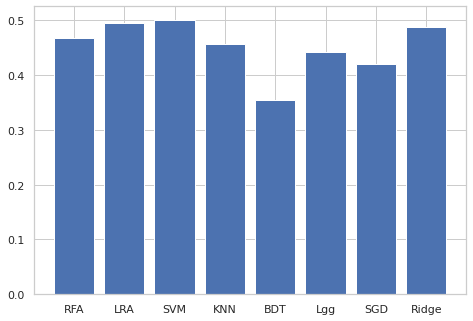

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
list_acc = [np.array(random_forest_list).mean(),np.array(regression_list).mean(),np.array(svm_list).mean(), np.array(knn_list).mean(), np.array(btree_list).mean(),np.array(lgg_list).mean(),np.array(sgd_list).mean(),np.array(ridge_list).mean()]
classifiers = ['RFA','LRA','SVM','KNN','BDT','Lgg','SGD', 'Ridge']
ax.bar(classifiers,list_acc)
plt.show()

# **Changing Hyperparameters of the models**


**Applying GridSearchCV**

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#SGD
loss = ['hinge', 'modified_huber', 'log']
penalty = ['l1','l2']
alpha= [0.0001,0.001,0.01,0.1]
l1_ratio= [0.15,0.05,.025]
max_iter = [1,5,10,100,1000,10000]
sgd_grid = dict(loss=loss,penalty=penalty,max_iter=max_iter,alpha=alpha,l1_ratio=l1_ratio)

#Ridge
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ridge_grid = dict(alpha=alpha)

#K-Nearest - Neighborg
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#Support Vector Classifier
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel,C=C,gamma=gamma)

#Bagging Classifier
n_estimators = [10, 100, 1000]
bag_grid = dict(n_estimators=n_estimators)

#Random Forest
n_estimators = [10, 100, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Logistic Regrresion
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)

Applying GridSearch for each model

In [60]:
models = [clf_random,clf_logistic,clf_svm,clf_KNN,clf_btree,clf_lgg,clf_sgd,clf_ridge]
grids = [rf_grid, lr_grid, svc_grid, knn_grid, bag_grid, lgg_grid, sgd_grid, ridge_grid]
col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    grid_search = GridSearchCV(estimator=models[col], 
                  param_grid=grids[col], n_jobs=-1, cv=cv,  
                  scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(X_train, y_train)
    resul.iloc[1,col] = grid_clf_acc.score(X_validation,y_validation)
    col += 1
resul.head()

SGD Ridge   KNN   SVM   BDT RndForest LogReg   LGB
Case                                                             
Standard      0.89  0.54  0.59  0.61  0.85      0.87   0.54  0.54
GridSearch    0.88  0.52  0.59  0.88  0.87      0.63   0.53  0.54
RandomSearch     0     0     0     0     0         0      0     0
Hyperopt         0     0     0     0     0         0      0     0

**Applying RandomSearchCV**

In [62]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col],
    param_distributions=grids[col],n_iter=n_iter_search, cv=cv)
    random_search.fit(X_train,y_train)
    resul.iloc[2,col] = random_search.score(X_validation,y_validation)
    col += 1
resul.head()

SGD Ridge   KNN   SVM   BDT RndForest LogReg   LGB
Case                                                             
Standard      0.89  0.54  0.59  0.61  0.85      0.87   0.54  0.54
GridSearch    0.88  0.52  0.59  0.88  0.87      0.63   0.53  0.54
RandomSearch  0.88  0.52  0.55   0.9  0.86      0.72   0.47  0.56
Hyperopt         0     0     0     0     0         0      0     0

[[47  0  0]
 [28  0  0]
 [25  0  0]]


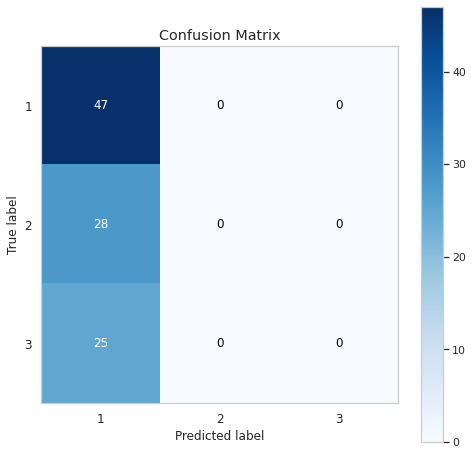

In [68]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,  
                             random_state=1)
n_iter_search = 3
random_search = RandomizedSearchCV(estimator=clf_svm,
    param_distributions=svc_grid,n_iter=n_iter_search, cv=cv)
random_win = random_search.fit(X_train, y_train)
#Predict values based on new parameters
yv_pred = random_win.predict(X_validation)
print(confusion_matrix(y_validation, yv_pred))
skplt.metrics.plot_confusion_matrix(y_validation, yv_pred,figsize=(8,8))

In [69]:
print("Best: %f using %s" % (random_win.best_score_, random_win.best_params_))

Best: 0.488889 using {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1.0}


**Feature ranking :**
In this part let's see how Random Forest models are using the variable to solve this complex task.

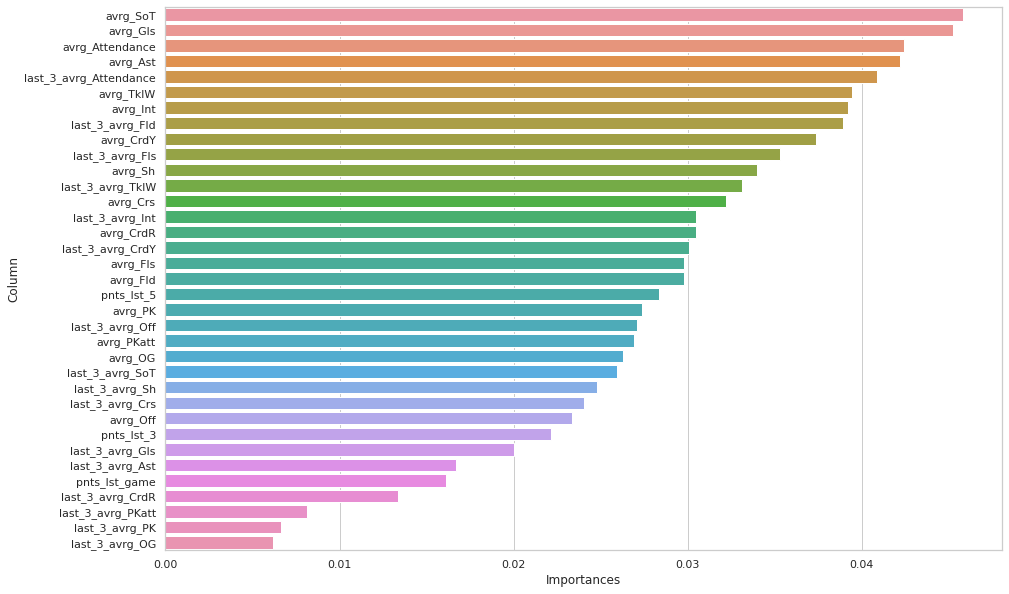

In [72]:
importance = clf_random.feature_importances_

list_1 = []
list_2 = []
for i,j in zip(importance,entry.columns):
    list_1.append(str(j))
    list_2.append(i)
    
df_name = pd.DataFrame(list_1,columns=["Column"])
df_number = pd.DataFrame(list_2,columns=["Importances"])

df_ranking = pd.concat([df_name, df_number], axis=1)
df_final = df_ranking.sort_values("Importances",ascending=False).reset_index(drop=True)
df_final.Column = df_final.Column.astype(str)
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Importances", y="Column", data=df_final)